# Disease Prediction and Impact Minimization
### By Robert Walsh, Josh Sapira, and Sydney Seder

Our project here aims to use and modify the SIRD model to implement strategies to minimize a hypothetical pandemic's effects. We perform this through two strategies: A variable quarantine system that can either prevent or greatly reduce the number of infections from newly infected populations, and a set of vaccination strategies that immediately place susceptible populations into the recovered/immune groups

### Additional Details on Quarantine: 
The quarantine system works by keeping track of a list of simulation dates and the number of newly infected individuals on that day. If a day's value plus the quarantine time is less than the current day, the infection rate is either reduced or eliminated within that specific group of infected.
For Example: 5 people become infected on day 3, and the quarantine time is 7 days. Let's also say there is a 40% delinquency on the quarantine. This means until day 11, the effective infected population from these 5 people have been reduced to 2 people instead, greatly reducing the infectivity of the disease.

### Additional Details on Vaccination: 
The Vaccination system is divided into 3 different strategies: A delayed but effective serum delays the vaccination by 20 days but makes its effectivity shoot to 98%, A constant vaccination that has a 95% effectivity rate, and a rushed vaccine for 10% of the population with 90% effectivity and constant vacciantion with 95% effectivity afterwards.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# This package here is where we defined our SIRD model and specific special features, feel free to look at it to learn more
import DiseaseAnalysis

# Analysis 1: Function Check
We will see how two populations of a hypothetical pandemic interacts
Population 1 is a smaller and more sparse population of 10,000 people. Due to the more sparse population, their infection rates are lower, requiring 4 infected for every new infected. Every day an infected individual has a 5% chance to recover, but also a 5% chance to die from the disease.
Population 2 is a larger and more densly populated area of 100,000 people. This leads to a higher infection rate, but this population has better medical care facilities, leading to a 5% rate of recovery per day, but only 1% rate of death per day. This is also the population that patient 0 starts in.
Both populations also have frequent visitors from each area, both have 1% of their population travel between the two cities.
### There is no quarantine or additional measures in effect for this test.

In [2]:
# ADJUST THE VALUES HERE TO SEE DIFFERENT RESULTS

# Total pop, infection rate, recovery rate, death rate, crossInfectivity, StartInfected, quarantine leak rate, quarantine time
group1 = DiseaseAnalysis.Population(10000, 0.25, 0.05, 0.01, 0.01, False, 1, 1)

group2 = DiseaseAnalysis.Population(100000, 0.3, 0.05, 0.01, 0.01, True, 1, 1)

In [3]:
S = [group1.S + group2.S]
I = [group1.I + group2.I]
R = [group1.R + group2.R]
D = [group1.D + group2.D]

for i in range(100):
    group1.SIRD()
    group2.SIRD()
    
    DiseaseAnalysis.crossInfect([group1, group2])
    
    S.append(group1.S + group2.S)
    I.append(group1.I + group2.I)
    R.append(group1.R + group2.R)
    D.append(group1.D + group2.D)
    
print(S[-1] + I[-1] + R[-1] + D[-1])

110000.00000000003


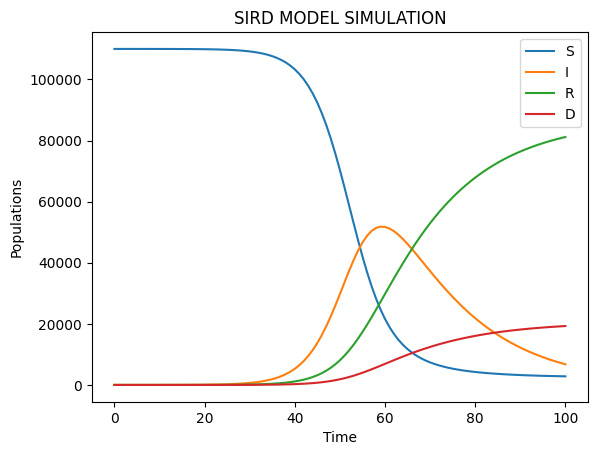

In [4]:
plt.plot(S, label="S")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.plot(D, label="D")
plt.xlabel("Time")
plt.ylabel("Populations")
plt.title("SIRD MODEL SIMULATION")
plt.legend()
plt.show()

# Analysis 2: Quarantine Check
Population 3 is another generic population infected with an unknown pathogen. This population has 10,000 people, a 25% infection rate, 5% recovery, and 1% death rate. A Quarantine is in effect, and enforced under strict measures. All infected are not allowed outside until the end of the quarantine period reducing their infectivity to 0. This population has a quarantine period of 14 days from first signs of infection.

9999.999999999993


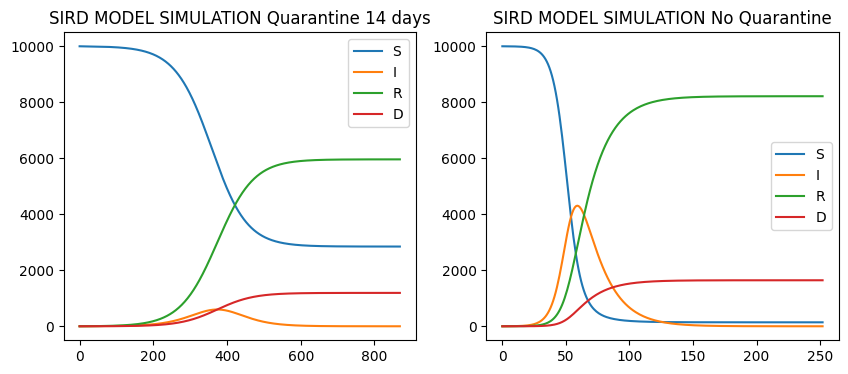

Total Deaths: 1192.1144956860035


In [6]:
# ADJUST THESE VALUES TO SEE DIFFERENT RESULTS

# Total pop, infection rate, recovery rate, death rate, crossInfectivity, StartInfected, quarantine leak rate, quarantine time
group3 = DiseaseAnalysis.Population(10000, 0.25, 0.05, 0.01, 0.01, True, 0, 14)
group4 = DiseaseAnalysis.Population(10000, 0.25, 0.05, 0.01, 0.01, True, 0, 0)

S = [group3.S]
I = [group3.I]
R = [group3.R]
D = [group3.D]

S2 = [group4.S]
I2 = [group4.I]
R2 = [group4.R]
D2 = [group4.D]

while group3.I > 0.1:
    group3.SIRD()
    
    S.append(group3.S)
    I.append(group3.I)
    R.append(group3.R)
    D.append(group3.D)
    
while group4.I > 0.1:
    group4.SIRD()
    
    S2.append(group4.S)
    I2.append(group4.I)
    R2.append(group4.R)
    D2.append(group4.D)
    
print(S[-1] + I[-1] + R[-1] + D[-1])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (10, 4))

ax1.plot(S, label="S")
ax1.plot(I, label="I")
ax1.plot(R, label="R")
ax1.plot(D, label="D")
ax1.set_title("SIRD MODEL SIMULATION Quarantine 14 days")
ax1.legend()

ax2.plot(S2, label="S")
ax2.plot(I2, label="I")
ax2.plot(R2, label="R")
ax2.plot(D2, label="D")
ax2.set_title("SIRD MODEL SIMULATION No Quarantine")
ax2.legend()

plt.show()

print("Total Deaths: {}".format(D[-1]))

# Analysis 3: Quarantine Effectiveness
Population 4 is identical to population 3, with the exception that it is willing to experiment with quarantine rates.
This is to help us show that this system is indeed functional, and better strategize how to apply this to minimization.

Days of Quarantine: 1, Total Deaths: 1643.0585847262396
Days of Quarantine: 2, Total Deaths: 1634.8518585079794
Days of Quarantine: 3, Total Deaths: 1624.6352197056592
Days of Quarantine: 4, Total Deaths: 1612.0789448373146
Days of Quarantine: 5, Total Deaths: 1596.8266365607235
Days of Quarantine: 6, Total Deaths: 1578.4909081213552
Days of Quarantine: 7, Total Deaths: 1556.6511228196466
Days of Quarantine: 8, Total Deaths: 1530.8498758800322
Days of Quarantine: 9, Total Deaths: 1500.5923267034207
Days of Quarantine: 10, Total Deaths: 1465.3412145390664
Days of Quarantine: 11, Total Deaths: 1424.5176146784977
Days of Quarantine: 12, Total Deaths: 1377.4904339474872
Days of Quarantine: 13, Total Deaths: 1323.581607887825
Days of Quarantine: 14, Total Deaths: 1262.0550725130631
Days of Quarantine: 15, Total Deaths: 1192.1144956860035
Days of Quarantine: 16, Total Deaths: 1112.9038293179308
Days of Quarantine: 17, Total Deaths: 1023.4979637862995
Days of Quarantine: 18, Total Deaths: 922

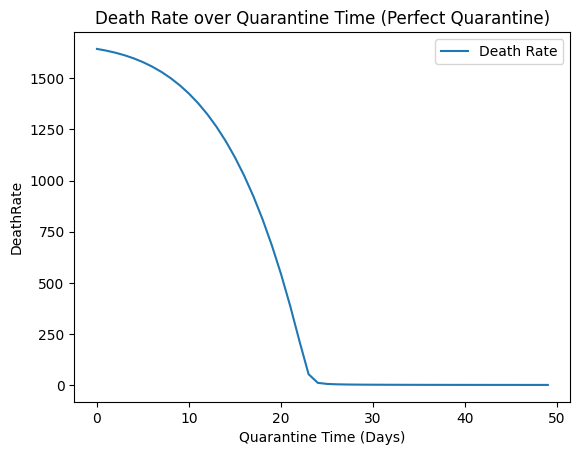

In [6]:
deathMeasurements = []

for i in range(50):
    # Change this to adjust results
    group4 = DiseaseAnalysis.Population(10000, 0.25, 0.05, 0.01, 0.01, True, 0, i)
    
    while group4.I > 0.1:
        group4.SIRD()
        
    deathMeasurements.append(group4.D)
    print("Days of Quarantine: {}, Total Deaths: {}".format(i + 1, group4.D))
    
plt.plot(deathMeasurements, label="Death Rate")
plt.xlabel("Quarantine Time (Days)")
plt.ylabel("DeathRate")
plt.title("Death Rate over Quarantine Time (Perfect Quarantine)")
plt.legend()
plt.show()

# Analysis 4: Imperfect Quarantine
Just like with above, but we have implemented an imperfect quarantine. There is a delinquency rate of 25%.

Days of Quarantine: 1, Total Deaths: 1643.0585847262396
Days of Quarantine: 2, Total Deaths: 1637.1320165882998
Days of Quarantine: 3, Total Deaths: 1630.2586701111018
Days of Quarantine: 4, Total Deaths: 1622.3730212634835
Days of Quarantine: 5, Total Deaths: 1613.4156810501077
Days of Quarantine: 6, Total Deaths: 1603.3330360560656
Days of Quarantine: 7, Total Deaths: 1592.0779434712576
Days of Quarantine: 8, Total Deaths: 1579.6133661856227
Days of Quarantine: 9, Total Deaths: 1565.9099599865667
Days of Quarantine: 10, Total Deaths: 1550.9475396398589
Days of Quarantine: 11, Total Deaths: 1534.7144667392545
Days of Quarantine: 12, Total Deaths: 1517.2118608805038
Days of Quarantine: 13, Total Deaths: 1498.4467779214458
Days of Quarantine: 14, Total Deaths: 1478.439154627141
Days of Quarantine: 15, Total Deaths: 1457.2177104730513
Days of Quarantine: 16, Total Deaths: 1434.8206649963863
Days of Quarantine: 17, Total Deaths: 1411.2953423855145
Days of Quarantine: 18, Total Deaths: 138

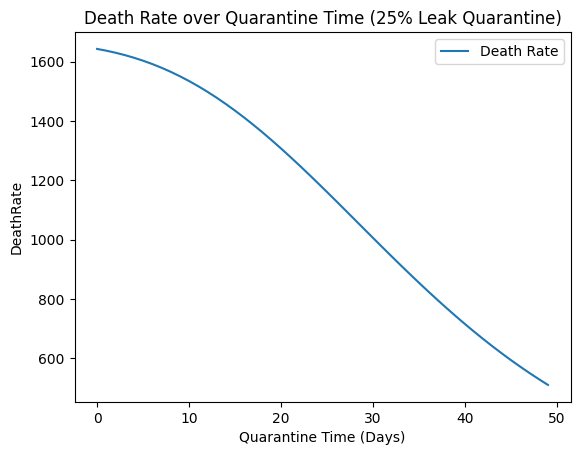

In [7]:
deathMeasurements = []

for i in range(50):
    # Change these values to see new results
    group5 = DiseaseAnalysis.Population(10000, 0.25, 0.05, 0.01, 0.01, True, 0.25, i)
    
    while group5.I > 0.1:
        group5.SIRD()
        
    deathMeasurements.append(group5.D)
    print("Days of Quarantine: {}, Total Deaths: {}".format(i + 1, group5.D))
    
plt.plot(deathMeasurements, label="Death Rate")
plt.xlabel("Quarantine Time (Days)")
plt.ylabel("DeathRate")
plt.title("Death Rate over Quarantine Time (25% Leak Quarantine)")
plt.legend()
plt.show()

## Helper functions
These functions can help us with determining the costs of quarantine

### Quarantine Cost Given Length:
This function gives us a limiting factor on quarantine lengths. While it is true that if we wanted to minimize deaths alone we could implement an infinite quarantine, this would not be practical or ideal in a real situation. This function helps us keep our minimization function grounded and understand the costs that long quarantines have on both psychological states of the people involved and the economic harms as well. This helps produce a realistic quarantine time based on the number of deaths prevented vs the additional harm for prolonged quarantines.

### Total Deaths Plus Cost:
This function gives us our total cost of implementing a quarantine. Longer periods harm the economy more, and shorter times risk people's lives. This function can produce a value for the total cost of implementing a quarantine of a specific length based on the populations involved.

In [2]:
# ----------------------------
# Cost Function: Based only on quarantine length
# ----------------------------
def quarantine_cost_given_length(length, beta=500, gamma=2500):
    length = int(length)
    # Duration cost models linear costs like lost wages, missed appointments, and interrupted schooling
    duration_cost = beta * length
    
    # Duration penalty models costs that increase faster as the quarantine length increases, like economic
    # stagnation, mental health degredation, breakdown of public compliance, and civil and political unrest
    duration_penalty = gamma * (length ** 2)
    return duration_cost + duration_penalty

# ----------------------------
# Combined Objective: deaths + cost
# ----------------------------
def total_deaths_plus_cost(length, alpha=1_000, beta=500, gamma=2500, popArgs=None):
    '''
    Alpha is the amount of costs saving 1 life is worth. 
    Beta represents the linear costs of quarantining. 
    Gamma represents the quadratic costs of quarantining.
    '''

    length = int(length)
    
    if popArgs is None:
        popArgs = [[100000, 0.5, 0.1, 0.05, 0.01, True, 0]]
    
    pops = []
    for popArg in popArgs:
        pops.append(DiseaseAnalysis.Population(popArg[0], popArg[1], popArg[2], popArg[3], popArg[4], popArg[5], popArg[6], length))
    
    while sum(pop.I for pop in pops) > 0.1:
        for pop in pops:
            pop.SIRD()
        
        DiseaseAnalysis.crossInfect(pops)
    
    deaths = sum(pop.D for pop in pops)
    cost = quarantine_cost_given_length(length, beta=beta, gamma=gamma)

    # Weighted sum of deaths + cost
    return alpha * deaths + cost

# Analysis 5: Minimization without vaccination
This is where we introduce our minimization function. We will be using the scipy "minimize_scalar" function to help us determine the minimum cost value. This function makes use of the Brent method, which is a quadratic style of minimization which converges towards an optimal value based on the bounds we pass to it.
In this case we will use this minimization algorithm to help us find the optimal number of quarantine days.

For this experiment our population is a singular group of people of 100,000 people with an infection rate of 0.5, a recovery rate of 0.1, and a death rate of 0.05. The quarantine is perfect and there is no delinquency.

Optimal Quarantine Length: 8 days
Minimized (Deaths + Cost): 175657.20


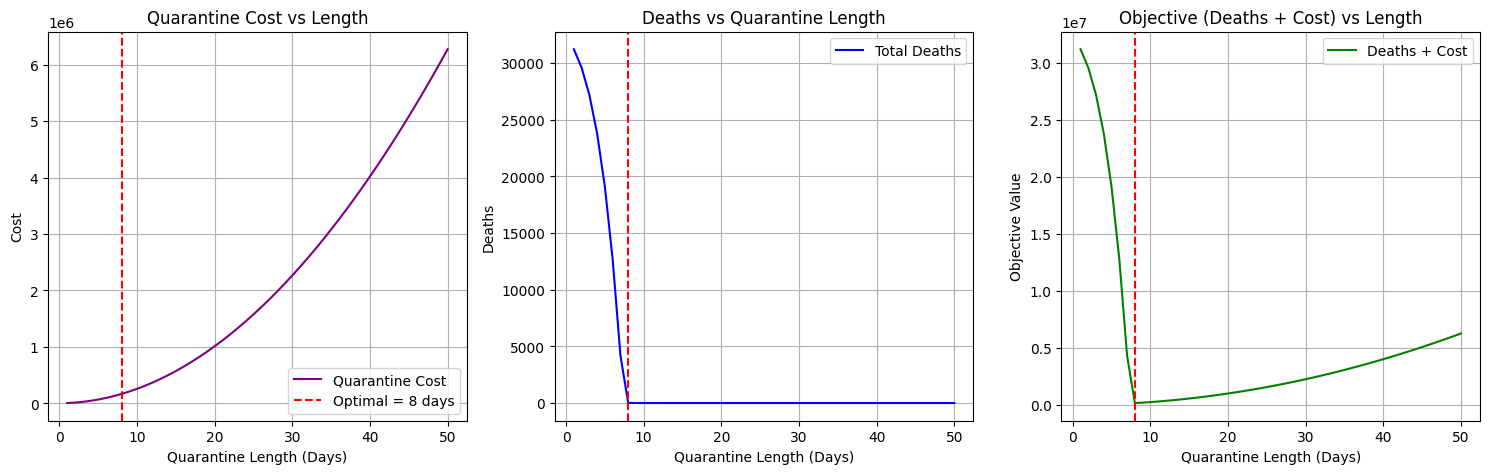

In [9]:
# ----------------------------
# Optimization: minimize deaths + cost
# ----------------------------

# You can adjust these values to see different results, just like with the class call
# pop size, infect rate, recovery rate, death rate, crossinfect, startInfected, and quarantine effectiveness
# no quarantine length as that will be filled in with the optimization algorithm
pops = [[100000, 0.5, 0.1, 0.05, 0.01, True, 0]]
result = minimize_scalar(
    total_deaths_plus_cost,
    bounds=(1, 50),
    method='bounded',
    args=(1_000, 500, 2500, pops)
)

optimal_days = int(result.x)
min_total = result.fun
print(f"Optimal Quarantine Length: {optimal_days} days")
print(f"Minimized (Deaths + Cost): {min_total:.2f}")

# ----------------------------
# Evaluate across all lengths for plotting
# ----------------------------
lengths = list(range(1, 51))
total_costs = [quarantine_cost_given_length(l) for l in lengths]
deaths = []
total_objective = []

for l in lengths:
    
    # Keep the class call the same as above for consistent results
    pop = DiseaseAnalysis.Population(
        N=100000,
        beta=0.5,
        gamma=0.1,
        mu=0.05,
        crossInfectivity=0.01,
        infected=True,
        quarantineLeak=0.0,
        quarantineLength=l
    )
    
    while pop.I > 0.1:
        pop.SIRD()
    d = pop.D
    deaths.append(d)    
    total_objective.append(total_deaths_plus_cost(l))

# ----------------------------
# Plotting
# ----------------------------
plt.figure(figsize=(15, 5))

# Total cost
plt.subplot(1, 3, 1)
plt.plot(lengths, total_costs, label="Quarantine Cost", color='purple')
plt.axvline(optimal_days, color='red', linestyle='--', label=f"Optimal = {optimal_days} days")
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Cost")
plt.title("Quarantine Cost vs Length")
plt.grid(True)
plt.legend()

# Total deaths
plt.subplot(1, 3, 2)
plt.plot(lengths, deaths, label="Total Deaths", color='blue')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Deaths")
plt.title("Deaths vs Quarantine Length")
plt.grid(True)
plt.legend()

# Total objective (Deaths + Cost)
plt.subplot(1, 3, 3)
plt.plot(lengths, total_objective, label="Deaths + Cost", color='green')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Objective Value")
plt.title("Objective (Deaths + Cost) vs Length")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Additional Helper Functions
These functions allow us to use vaccinations to help reduce the death rate of our diseases.

### Simulate with Vaccine:
This function runs the SIRD algorithm with cross infections all while applying a vaccination function to all populations

### Constant Rollout
This function applies a constant rollout of vaccinations. Every day, 1% of the susceptible population gets a vaccination with 85% effectivity

### Delayed, High Efficiency
This function does not do anything for the first 20 days of a disease outbreak, to represent the time to research and find an effective vaccination. Afterwards, the vaccination becomes 95% effective and is given to 1% of the susceptible popluation each day

### Priority Groups First
This function prioritizes rushing to produce a vaccination as fast as possible for a priority group. This group represents 10% of the total population. Vaccinations are given to 1.5% of the population a day with a 75% effectiveness, and 85% after the priority group is vaccinated.

In [3]:
def simulate_with_vaccine(pops, rollout_plan=None):
    """
    Simulates disease spread with a custom vaccine rollout plan.
    rollout_plan: function(day, pop) → (num_vaccines, efficacy)
    """
    S, I, R, D = [sum(pop.S for pop in pops)], [sum(pop.I for pop in pops)], [sum(pop.R for pop in pops)], [sum(pop.D for pop in pops)]
    
    daycount = 1
    while sum(pop.I for pop in pops) > 0.1:
        for pop in pops:
            if rollout_plan:
                num_vax, eff = rollout_plan(daycount, pop)
                pop.apply_vaccination(num_vax, eff)
            pop.SIRD()
        
        DiseaseAnalysis.crossInfect(pops)
        
        S.append(sum(pop.S for pop in pops))
        I.append(sum(pop.I for pop in pops))
        R.append(sum(pop.R for pop in pops))
        D.append(sum(pop.D for pop in pops))
        
        daycount += 1
    
    return S, I, R, D

# ALT VERSIONS, based on population portions
def constant_rollout(day, pop):
    return (pop.S / 100), 0.85  # 1% people per day, 95% effective

def delayed_high_efficacy(day, pop):
    if day < 20:
        return 0, 0  # wait for better vaccines
    return (pop.S / 100), 0.95

def priority_group_first(day, pop):
    group_size = 0.1 * pop.N
    vaccinated_so_far = pop.R + pop.D  # Approximate
    if vaccinated_so_far < group_size:
        return ((pop.S * 1.5) / 100), 0.75  # faster early rollout
    return (pop.S / 100), 0.85  # normal pace after

# Analysis 6: Vaccination Effectiveness
Here we have 4 identical populations, and we will be testing the different vaccination strategies on all of them to see which one minimizes the deaths the most.

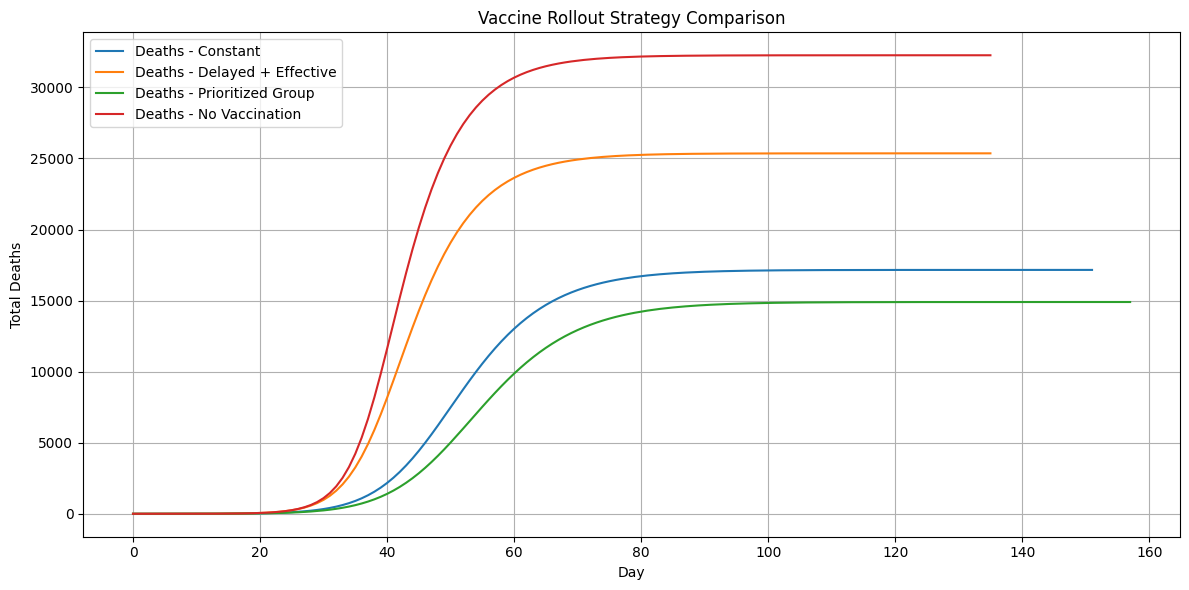

In [8]:
# Create population
pop1 = DiseaseAnalysis.Population(100000, 0.5, 0.1, 0.05, 0.01, True, quarantineLeak=0.0, quarantineLength=0)
pop2 = DiseaseAnalysis.Population(100000, 0.5, 0.1, 0.05, 0.01, True, quarantineLeak=0.0, quarantineLength=0)
pop3 = DiseaseAnalysis.Population(100000, 0.5, 0.1, 0.05, 0.01, True, quarantineLeak=0.0, quarantineLength=0)

pop4 = DiseaseAnalysis.Population(100000, 0.5, 0.1, 0.05, 0.01, True, quarantineLeak=0.0, quarantineLength=0)

# Simulate
S1, I1, R1, D1 = simulate_with_vaccine([pop1], rollout_plan=constant_rollout)
S2, I2, R2, D2 = simulate_with_vaccine([pop2], rollout_plan=delayed_high_efficacy)
S3, I3, R3, D3 = simulate_with_vaccine([pop3], rollout_plan=priority_group_first)

S4, I4, R4, D4 = [pop4.S], [pop4.I], [pop4.R], [pop4.D]

while pop4.I > 0.1:
    pop4.SIRD()
    S4.append(pop4.S)
    I4.append(pop4.I)
    R4.append(pop4.R)
    D4.append(pop4.D)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(D1, label="Deaths - Constant")
plt.plot(D2, label="Deaths - Delayed + Effective")
plt.plot(D3, label="Deaths - Prioritized Group")
plt.plot(D4, label="Deaths - No Vaccination")
plt.title("Vaccine Rollout Strategy Comparison")
plt.xlabel("Day")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analysis 7: Initial tests with real pandemic data (COVID-19)

Through research, we were able to uncover information that could lead to effective modeling of the COVID-19 pandemic. We found that the average infected individual infects 0.32 people a day based on one study, recovery is 99%, and mortality is 1.1%

100000.00000000003


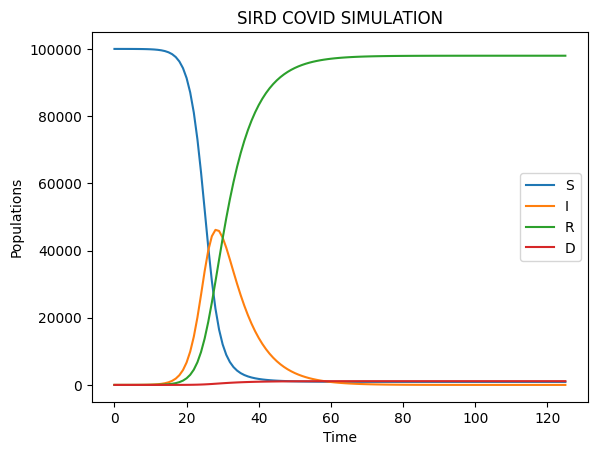

Death Rate: 1119.7409428952344


In [12]:
# Analyze COVID 19 data based on real information:
# https://virologyj.biomedcentral.com/articles/10.1186/s12985-021-01609-w#:~:text=Out%20of%207168%20contacts%2C%2064,0.89%25%20(Table%201). Asserts that infection rate is 0.32. For their study 200 individuals were able to infect 64 people in a day.
# recovery rate is about 99% in the US after 2 weeks, divided by 14 days comes out to around expected 7% every day
# Mortality rate as shown at Johns Hopkins: https://coronavirus.jhu.edu/data/mortality, suggests that mortality in the US is 1.1%, we will use this divided by around the 2 weeks metric as said earlier 0.08% per day
# for cross infectivity, we will assume that 10% of the population will travel to a different city per day

covPop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0, 0)

S = [covPop1.S]
I = [covPop1.I]
R = [covPop1.R]
D = [covPop1.D]

while covPop1.I > 0.1:
    covPop1.SIRD()
    covPop1.SIRD()
    
    S.append(covPop1.S)
    I.append(covPop1.I)
    R.append(covPop1.R)
    D.append(covPop1.D)
    
print(S[-1] + I[-1] + R[-1] + D[-1])

plt.plot(S, label="S")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.plot(D, label="D")
plt.xlabel("Time")
plt.ylabel("Populations")
plt.title("SIRD COVID SIMULATION")
plt.legend()
plt.show()

print("Death Rate: {}".format(covPop1.D))

# Analysis 8: COVID quarantine and vaccination
We will now see how well we can minimize this pandemic with our the previous strategies of quarantine and vaccination alone

Optimal Quarantine Length: 20 days
Minimized (Deaths + Cost): 1098207.66


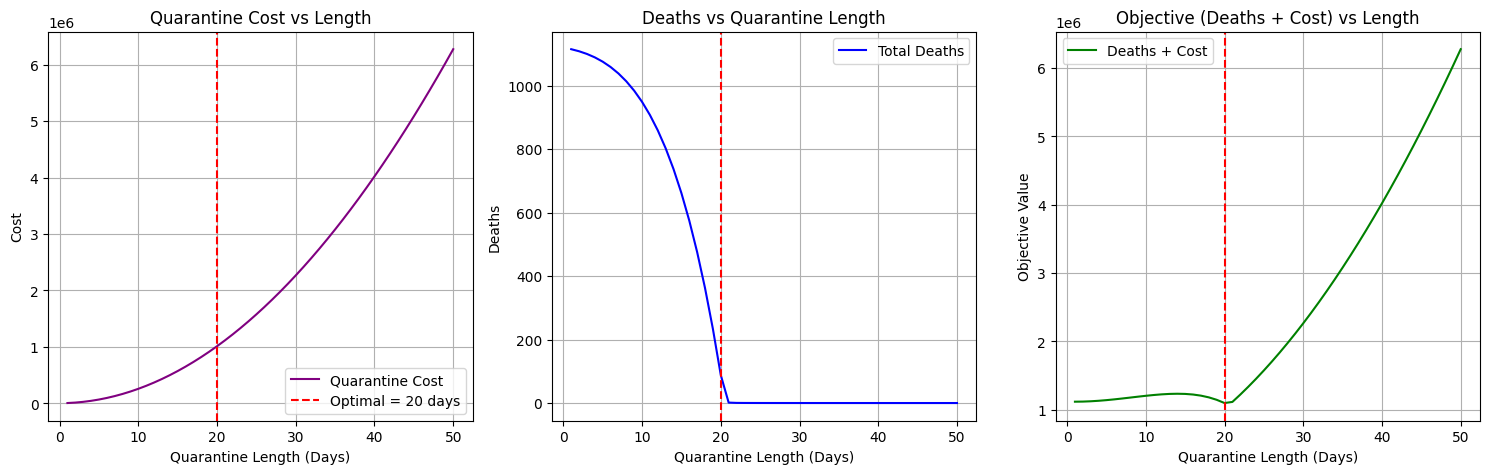

In [13]:
# DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0, 0)
popVals = [[100000, 0.32, 0.07, 0.0008, 0.1, True, 0, 0]]
result = minimize_scalar(
    total_deaths_plus_cost,
    bounds=(1, 50),
    method='bounded',
    args=(1_000, 500, 2500, popVals)
)

optimal_days = int(result.x)
min_total = result.fun
print(f"Optimal Quarantine Length: {optimal_days} days")
print(f"Minimized (Deaths + Cost): {min_total:.2f}")

# ----------------------------
# Evaluate across all lengths for plotting
# ----------------------------
lengths = list(range(1, 51))
total_costs = [quarantine_cost_given_length(l) for l in lengths]
deaths = []
total_objective = []

for l in lengths:
    pop = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0, l)
    while pop.I > 0.1:
        pop.SIRD()
    d = pop.D
    deaths.append(d)
    total_objective.append(total_deaths_plus_cost(l, popArgs=popVals))

# ----------------------------
# Plotting
# ----------------------------
plt.figure(figsize=(15, 5))

# Total cost
plt.subplot(1, 3, 1)
plt.plot(lengths, total_costs, label="Quarantine Cost", color='purple')
plt.axvline(optimal_days, color='red', linestyle='--', label=f"Optimal = {optimal_days} days")
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Cost")
plt.title("Quarantine Cost vs Length")
plt.grid(True)
plt.legend()

# Total deaths
plt.subplot(1, 3, 2)
plt.plot(lengths, deaths, label="Total Deaths", color='blue')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Deaths")
plt.title("Deaths vs Quarantine Length")
plt.grid(True)
plt.legend()

# Total objective (Deaths + Cost)
plt.subplot(1, 3, 3)
plt.plot(lengths, total_objective, label="Deaths + Cost", color='green')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Objective Value")
plt.title("Objective (Deaths + Cost) vs Length")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

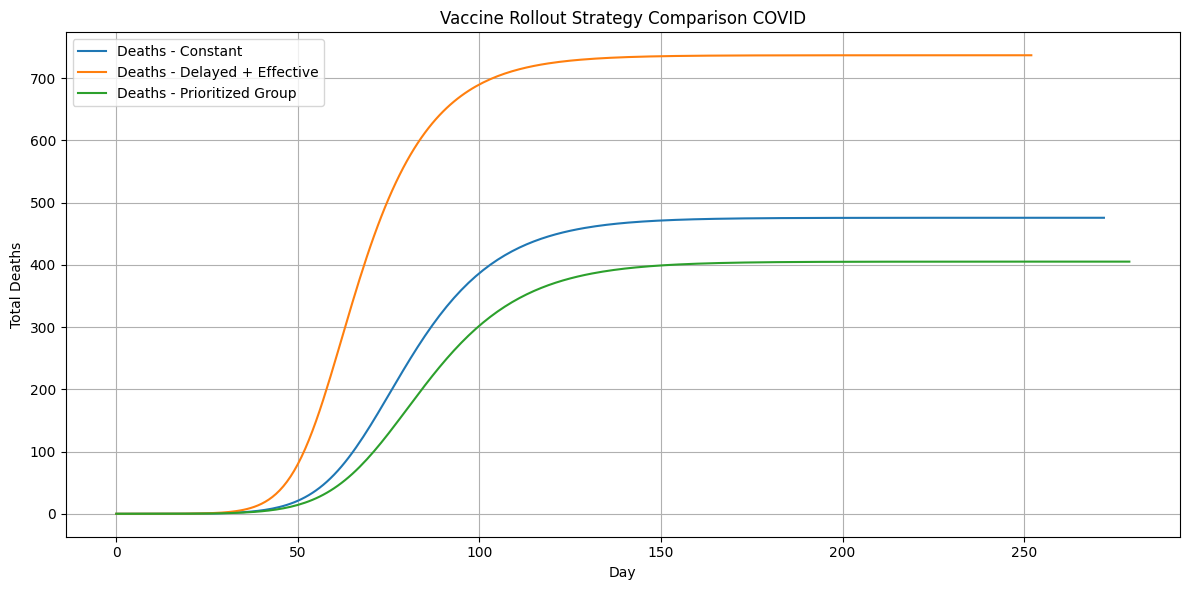

In [14]:
pop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0, 0)
pop2 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0, 0)
pop3= DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0, 0)

# Simulate
S1, I1, R1, D1 = simulate_with_vaccine([pop1], rollout_plan=constant_rollout)
S2, I2, R2, D2 = simulate_with_vaccine([pop2], rollout_plan=delayed_high_efficacy)
S3, I3, R3, D3 = simulate_with_vaccine([pop3], rollout_plan=priority_group_first)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(D1, label="Deaths - Constant")
plt.plot(D2, label="Deaths - Delayed + Effective")
plt.plot(D3, label="Deaths - Prioritized Group")
plt.title("Vaccine Rollout Strategy Comparison COVID")
plt.xlabel("Day")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analysis 9: COVID analysis with multiple populations
In this simulation we have two similar populations in terms of recovery and death rates, but population 2 is more densely populated leading to a higher infection rate of 0.5.

Optimal Quarantine Length: 21 days
Minimized (Deaths + Cost): 1200901.64


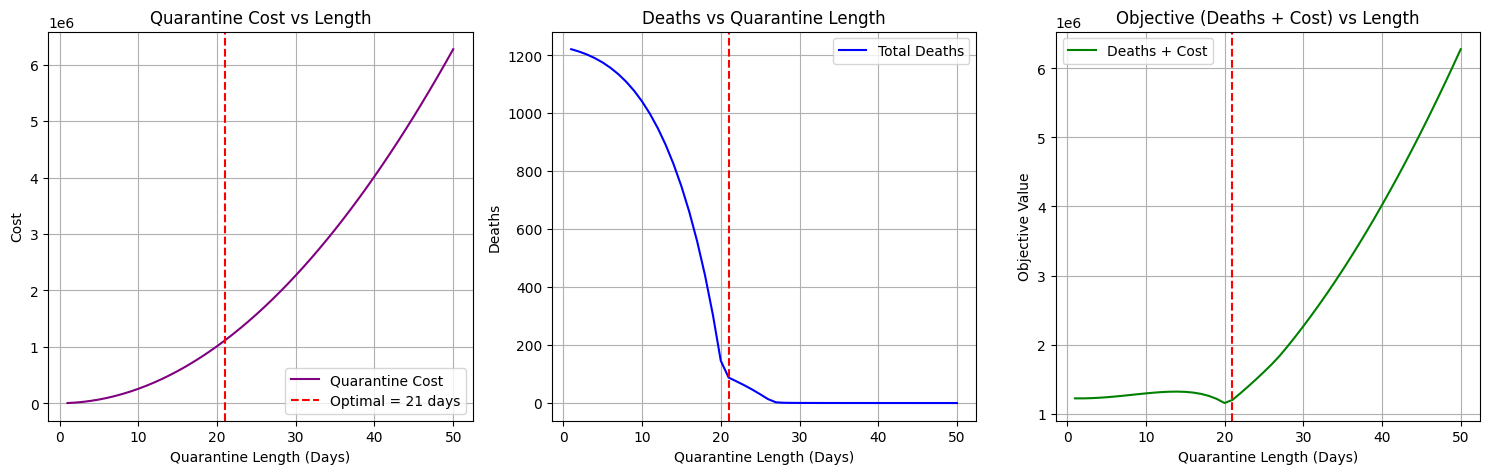

In [16]:
# Make another adjustment, deal with multiple populations

# pop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.0009, True, 0, 0)
# pop2 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.0009, True, 0, 0)

popVals = [[100000, 0.32, 0.07, 0.0008, 0.1, True, 0, 0], [10000, 0.5, 0.07, 0.0008, 0.1, True, 0, 0]]

result = minimize_scalar(
    total_deaths_plus_cost,
    bounds=(1, 50),
    method='bounded',
    args=(1_000, 500, 2500, popVals)
)

optimal_days = int(result.x)
min_total = result.fun
print(f"Optimal Quarantine Length: {optimal_days} days")
print(f"Minimized (Deaths + Cost): {min_total:.2f}")

# ----------------------------
# Evaluate across all lengths for plotting
# ----------------------------
lengths = list(range(1, 51))
total_costs = [quarantine_cost_given_length(l) for l in lengths]
deaths = []
total_objective = []

for l in lengths:
    pop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0, l)
    pop2 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0, l)
    while pop1.I + pop2.I > 0.1:
        pop1.SIRD()
        pop2.SIRD()
        DiseaseAnalysis.crossInfect([pop1, pop2])
        
    d = pop1.D + pop2.D
    deaths.append(d)
    total_objective.append(total_deaths_plus_cost(l, popArgs=popVals))

# ----------------------------
# Plotting
# ----------------------------
plt.figure(figsize=(15, 5))

# Total cost
plt.subplot(1, 3, 1)
plt.plot(lengths, total_costs, label="Quarantine Cost", color='purple')
plt.axvline(optimal_days, color='red', linestyle='--', label=f"Optimal = {optimal_days} days")
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Cost")
plt.title("Quarantine Cost vs Length")
plt.grid(True)
plt.legend()

# Total deaths
plt.subplot(1, 3, 2)
plt.plot(lengths, deaths, label="Total Deaths", color='blue')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Deaths")
plt.title("Deaths vs Quarantine Length")
plt.grid(True)
plt.legend()

# Total objective (Deaths + Cost)
plt.subplot(1, 3, 3)
plt.plot(lengths, total_objective, label="Deaths + Cost", color='green')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Objective Value")
plt.title("Objective (Deaths + Cost) vs Length")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

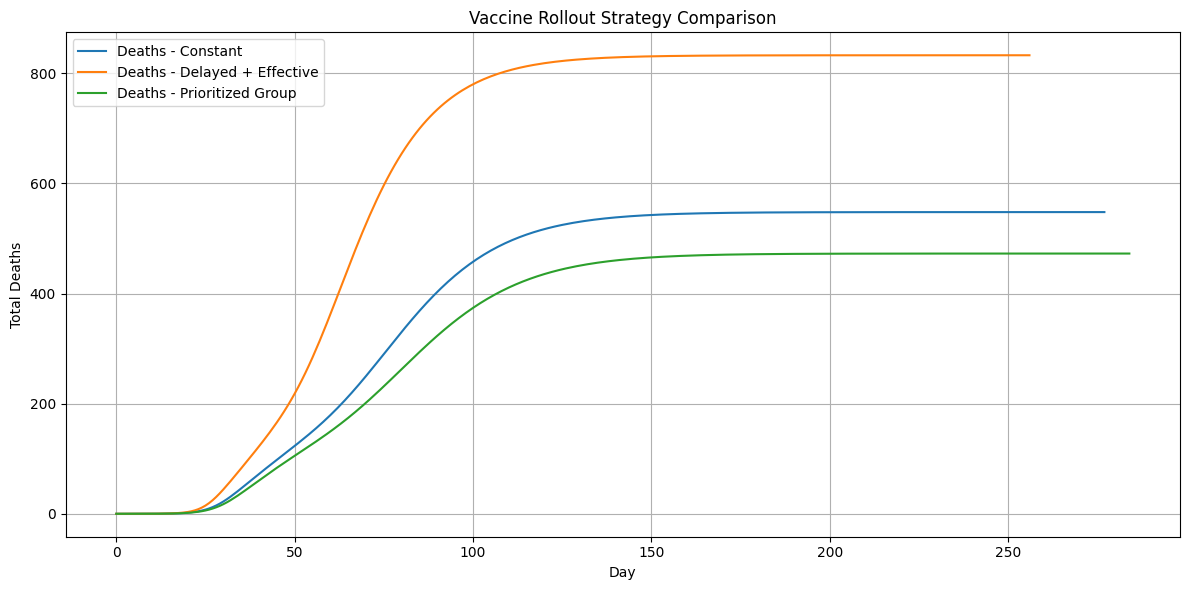

In [17]:
# Create population
pop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0, 0)
pop2 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0, 0)

pop3 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0, 0)
pop4 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0, 0)

pop5 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0, 0)
pop6 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0, 0)

# Simulate
S1, I1, R1, D1 = simulate_with_vaccine([pop1, pop2], rollout_plan=constant_rollout)
S2, I2, R2, D2 = simulate_with_vaccine([pop3, pop4], rollout_plan=delayed_high_efficacy)
S3, I3, R3, D3 = simulate_with_vaccine([pop5, pop6], rollout_plan=priority_group_first)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(D1, label="Deaths - Constant")
plt.plot(D2, label="Deaths - Delayed + Effective")
plt.plot(D3, label="Deaths - Prioritized Group")
plt.title("Vaccine Rollout Strategy Comparison")
plt.xlabel("Day")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Analysis 10: Realistic Quarantine, COVID 19 pandemic
Based on our research, we have discovered that only 60% of people actually followed quarantine protocols, meaning we should adjust our simulation to show how quarantine delinquency impacts results

Optimal Quarantine Length: 1 days
Minimized (Deaths + Cost): 1226468.72


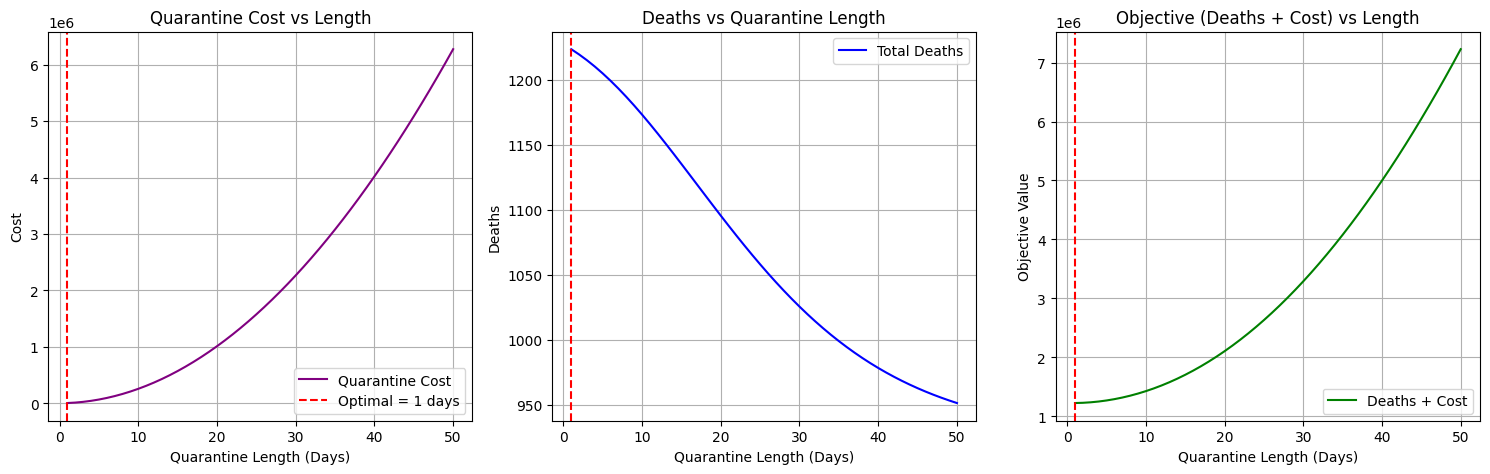

In [19]:
# https://pubmed.ncbi.nlm.nih.gov/36947142/
# This source suggests that about 60% of people actually followed quarantine protocols. Rerun the simulations with these ideas in mind

# Make another adjustment, deal with multiple populations

# pop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.0009, True, 0, 0)
# pop2 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.0009, True, 0, 0)

# 40% of people did not follow quarantine guidelines
# Population 1: Average US case of covid. Normal Settings
# Population 2: Smaller population, but highly dense by population, higher rate of infection
popVals = [[100000, 0.32, 0.07, 0.0008, 0.1, True, 0.4], [10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4]]

result = minimize_scalar(
    total_deaths_plus_cost,
    bounds=(1, 50),
    method='bounded',
    args=(1_000, 500, 2500, popVals)
)

optimal_days = int(result.x)
min_total = result.fun
print(f"Optimal Quarantine Length: {optimal_days} days")
print(f"Minimized (Deaths + Cost): {min_total:.2f}")

# ----------------------------
# Evaluate across all lengths for plotting
# ----------------------------
lengths = list(range(1, 51))
total_costs = [quarantine_cost_given_length(l) for l in lengths]
deaths = []
total_objective = []

for l in lengths:
    pop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0.4, l)
    pop2 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, l)
    while pop1.I + pop2.I > 0.1:
        pop1.SIRD()
        pop2.SIRD()
        DiseaseAnalysis.crossInfect([pop1, pop2])
        
    d = pop1.D + pop2.D
    deaths.append(d)
    total_objective.append(total_deaths_plus_cost(l, popArgs=popVals))

# ----------------------------
# Plotting
# ----------------------------
plt.figure(figsize=(15, 5))

# Total cost
plt.subplot(1, 3, 1)
plt.plot(lengths, total_costs, label="Quarantine Cost", color='purple')
plt.axvline(optimal_days, color='red', linestyle='--', label=f"Optimal = {optimal_days} days")
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Cost")
plt.title("Quarantine Cost vs Length")
plt.grid(True)
plt.legend()

# Total deaths
plt.subplot(1, 3, 2)
plt.plot(lengths, deaths, label="Total Deaths", color='blue')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Deaths")
plt.title("Deaths vs Quarantine Length")
plt.grid(True)
plt.legend()

# Total objective (Deaths + Cost)
plt.subplot(1, 3, 3)
plt.plot(lengths, total_objective, label="Deaths + Cost", color='green')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Objective Value")
plt.title("Objective (Deaths + Cost) vs Length")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# New Helper Function: Total Deaths Plus Cost VACCINE
This new function keeps vaccination strategies in mind when we look for optimal quarantine times.
Just like the previous function, it analyzes quarantine periods based on overall societal costs and deaths prevented, but now populations undergo vaccinations as the simulation runs.

In [4]:
def total_deaths_plus_cost_VACCINE(length, alpha=1_000, beta=500, gamma=2500, popArgs=None, vacPlan=constant_rollout):
    '''
    Alpha is the amount of costs saving 1 life is worth. 
    Beta represents the linear costs of quarantining. 
    Gamma represents the quadratic costs of quarantining.
    '''

    length = int(length)
    
    if popArgs is None:
        popArgs = [[100000, 0.5, 0.1, 0.05, 0.01, True, 0]]
    
    pops = []
    for popArg in popArgs:
        pops.append(DiseaseAnalysis.Population(popArg[0], popArg[1], popArg[2], popArg[3], popArg[4], popArg[5], popArg[6], length))
    
    simulate_with_vaccine(pops, vacPlan)
    
    deaths = sum(pop.D for pop in pops)
    cost = quarantine_cost_given_length(length, beta=beta, gamma=gamma)

    # Weighted sum of deaths + cost
    return alpha * deaths + cost

# Final Analysis, Vaccination plus quarantine simulation with COVID

Best Outcome from Priority Group First
Optimal Quarantine Length: 7 days
Minimized (Deaths + Cost): 304113.26


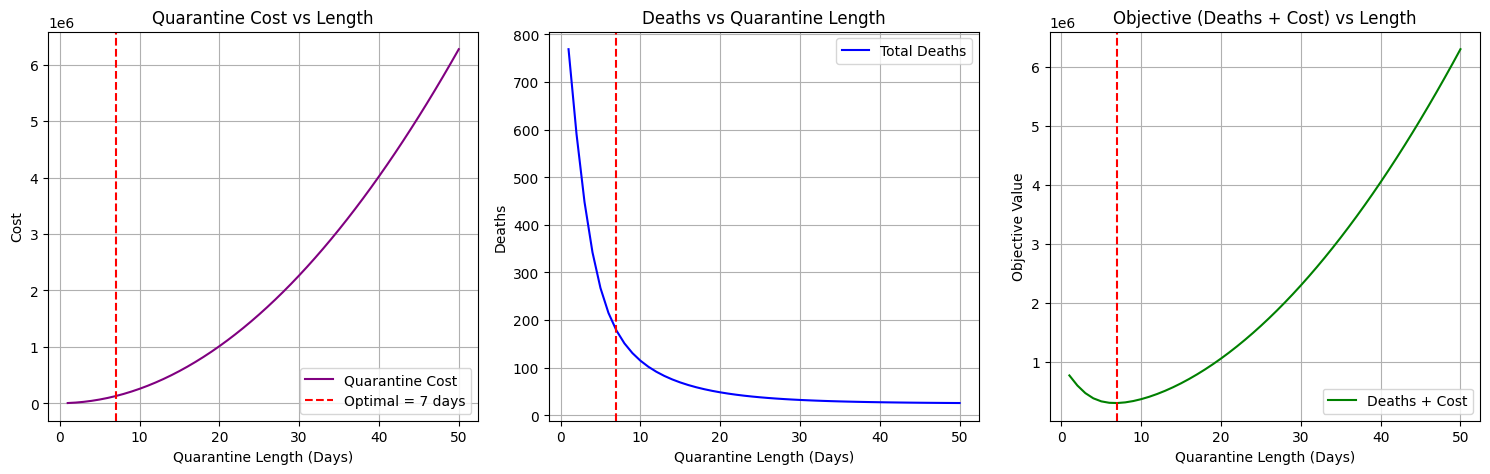

In [5]:
pops = [[100000, 0.32, 0.07, 0.0008, 0.1, True, 0.4], [10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4], [50000, 0.32, 0.07, 0.0008, 0.1, True, 0.4], [50000, 0.32, 0.07, 0.0008, 0.1, True, 0.4]]
result = minimize_scalar(
    total_deaths_plus_cost_VACCINE,
    bounds=(1, 50),
    method='bounded',
    args=(1_000, 500, 2500, pops, constant_rollout)
)

result2 = minimize_scalar(
    total_deaths_plus_cost_VACCINE,
    bounds=(1, 50),
    method='bounded',
    args=(1_000, 500, 2500, pops, delayed_high_efficacy)
)

result3 = minimize_scalar(
    total_deaths_plus_cost_VACCINE,
    bounds=(1, 50),
    method='bounded',
    args=(1_000, 500, 2500, pops, priority_group_first)
)

results = [int(result.fun), int(result2.fun), int(result3.fun)]

bestPlan = results.index(min(results))

# determine best plan from strategies
if bestPlan == 0:
    plan = constant_rollout
    print("Best Outcome from Constant Rollout")
elif bestPlan == 1:
    result = result2
    plan = delayed_high_efficacy
    print("Best Outcome from Delayed high Efficiency")
else:
    result = result3
    plan = priority_group_first
    print("Best Outcome from Priority Group First")
    

optimal_days = int(result.x)
min_total = result.fun
print(f"Optimal Quarantine Length: {optimal_days} days")
print(f"Minimized (Deaths + Cost): {min_total:.2f}")

# ----------------------------
# Evaluate across all lengths for plotting
# ----------------------------
lengths = list(range(1, 51))
total_costs = [quarantine_cost_given_length(l) for l in lengths]
deaths = []
total_objective = []

    
for l in lengths:
    pop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0.4, l)
    pop2 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, l)
    pop3 = DiseaseAnalysis.Population(50000, 0.32, 0.07, 0.0008, 0.1, True, 0.4, l)
    pop4 = DiseaseAnalysis.Population(50000, 0.32, 0.07, 0.0008, 0.1, True, 0.4, l)
    popGroup = [pop1, pop2, pop3, pop4]
    
    simulate_with_vaccine(popGroup, plan)
        
    d = sum(pop.D for pop in popGroup)
    
    deaths.append(d)    
    total_objective.append(total_deaths_plus_cost_VACCINE(l, popArgs=pops, vacPlan=plan))

# ----------------------------
# Plotting
# ----------------------------
plt.figure(figsize=(15, 5))

# Total cost
plt.subplot(1, 3, 1)
plt.plot(lengths, total_costs, label="Quarantine Cost", color='purple')
plt.axvline(optimal_days, color='red', linestyle='--', label=f"Optimal = {optimal_days} days")
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Cost")
plt.title("Quarantine Cost vs Length")
plt.grid(True)
plt.legend()

# Total deaths
plt.subplot(1, 3, 2)
plt.plot(lengths, deaths, label="Total Deaths", color='blue')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Deaths")
plt.title("Deaths vs Quarantine Length")
plt.grid(True)
plt.legend()

# Total objective (Deaths + Cost)
plt.subplot(1, 3, 3)
plt.plot(lengths, total_objective, label="Deaths + Cost", color='green')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Objective Value")
plt.title("Objective (Deaths + Cost) vs Length")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

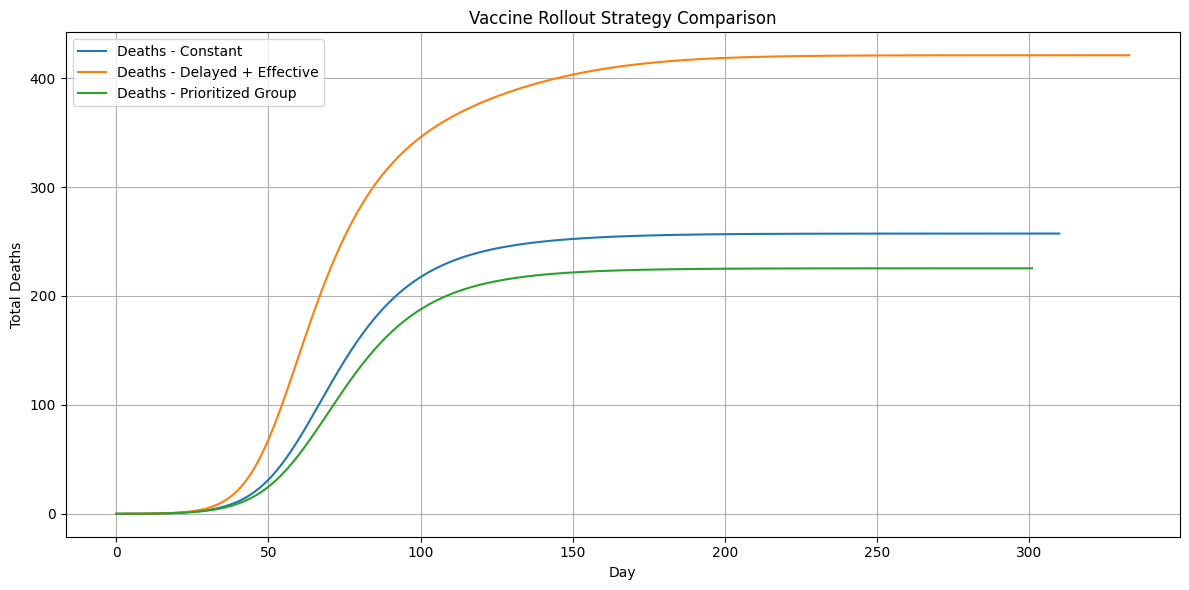

In [26]:
# Create population
pop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0.4, 7)
pop2 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, 7)
pop3 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, 7)
pop4 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, 7)

pops = [pop1, pop2, pop3, pop4]

S1, I1, R1, D1 = simulate_with_vaccine(pops, rollout_plan=constant_rollout)

pop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0.4, 7)
pop2 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, 7)
pop3 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, 7)
pop4 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, 7)

pops = [pop1, pop2, pop3, pop4]

S2, I2, R2, D2 = simulate_with_vaccine(pops, rollout_plan=delayed_high_efficacy)

# Simulate
pop1 = DiseaseAnalysis.Population(100000, 0.32, 0.07, 0.0008, 0.1, True, 0.4, 7)
pop2 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, 7)
pop3 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, 7)
pop4 = DiseaseAnalysis.Population(10000, 0.5, 0.07, 0.0008, 0.1, True, 0.4, 7)

pops = [pop1, pop2, pop3, pop4]

S3, I3, R3, D3 = simulate_with_vaccine(pops, rollout_plan=priority_group_first)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(D1, label="Deaths - Constant")
plt.plot(D2, label="Deaths - Delayed + Effective")
plt.plot(D3, label="Deaths - Prioritized Group")
plt.title("Vaccine Rollout Strategy Comparison")
plt.xlabel("Day")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Results:
We can see here that the optimal strategy for minimizing the number of deaths is to prioritize pushing out the vaccine to as many vulnerable peoples as possible, even if it means using a less effective, rushed, serum. We also found that short, controlled quarantines are the best when it comes to containing an outbreak as longer quarantines provide diminishing returns and may bring unintended consequences in the form of economic or psychological harms.